In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt

from CharacterFeatureExtractor import featureExtractor
from dataprep import *
from modeltrain import *
from classifier import *
from hmm_test import *
from createData import createData
from createDataSet import *
from DrawCharacter import DrawCharacter
from PattRecClasses import HMM_TA
from hmm_gen import hmm_gen


# Creating a dataset

In [2]:
# From pre-drawn letters, perform feature extraction and create a database with features and labels.
createDataSet(act=False, name="database")


/home/jonas/Local/Pattern-Recognition-Project
Dataset saved


# Model training example

In [3]:
# Specify the database to load
db_name = "database"

# Load in and divide the database into training and testing data, nr_test being the amount of test data.
train_data, test_data, data_labels = dataprep(db_name, nr_test=5)

# Specify the number of states the different character HMMs should have
class_state_nums = np.array([2,5,5,5,5,5,5,6,5,5])
# Number of training iterations
itr = 12

# Initialize and train the models
#hmm_learn, train_acc = modeltrain(train_data, data_labels, itr, class_state_nums, longest_sample=True, useprint=False)

# Test the models and extract results
#accuracies, result_labels_list = hmm_test(hmm_learn,test_data, data_labels)


Database read is  database
Labels used are  ['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
Total training samples are  15  and testing samples are  5 



# Pretrained model 

# Use pretrained model on new character input

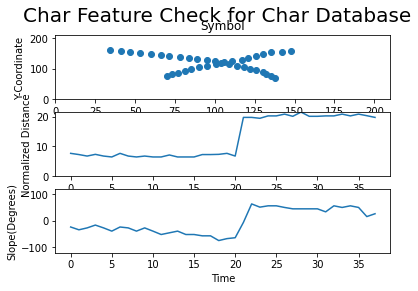

T


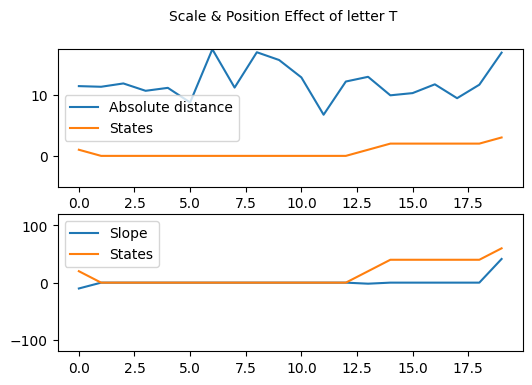

In [33]:
pts, feature_symbol, sampled_symbol = createData(save=False)

hmm_learn = pd.read_pickle(r'hmm_demo')


feature_symbol = np.transpose(feature_symbol)


label = classifier(hmm_learn, data_labels, feature_symbol)



print(label)

char = data_labels.index(label)


feature_symbol1, states = (hmm_learn[char].rand(20))

#hmm_learn[char].printoutput(0,0)

feature_symbol1 = np.transpose(feature_symbol1)

plt_num = 1  # number of samples plotted
f, axarr = plt.subplots(2, 1, dpi = 100)
f.suptitle('Scale & Position Effect of letter '+data_labels[char], fontsize=10)

# normalized distance ,slope, and t for symbol-1
f1_symbol1 = feature_symbol1[0]
f2_symbol1 = feature_symbol1[1]
t1 = np.array(range(0,feature_symbol1.shape[1]))


#------------- ABSOLUTE DISTANCE FEATURE
#Absolute distance plot of symbol-1
axarr[0].plot(t1, f1_symbol1)
axarr[0].plot(t1, states)

#axarr[1, i].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[0].set_ylim([-5,np.max(f1_symbol1)])

#------------- SLOPE FEATURE
#Y-wise distance plot of symbol-1
axarr[1].plot(t1, f2_symbol1)
axarr[1].plot(t1, states*20)

#axarr[2, i].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[1].set_ylim([-120,120])

axarr[0].legend(["Absolute distance", "States"])
axarr[1].legend(["Slope", "States"])

#featurevisual(data_features2, data_labels2, data_sampchar2, chars=[char])